In [1]:

from litellm import completion


ollama_llm = completion(
            model="ollama/gemma3:4b",
            api_base="http://localhost:11434"
            )

In [2]:
from crewai_tools import SerperDevTool

search_tool = SerperDevTool()


/Users/tharhtet/.local/share/virtualenvs/Agentic_RAG_projs-hQf1ctZM/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:623: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


In [3]:
from crewai import Agent, Task, Crew
from PIL import Image

In [4]:
product_text = "Eco-friendly reusable water bottle made of stainless steel, 1-liter capacity, keeps water cold for 24 hours."
product_image_path = "bottle_2.png"  



<class 'PIL.PngImagePlugin.PngImageFile'>


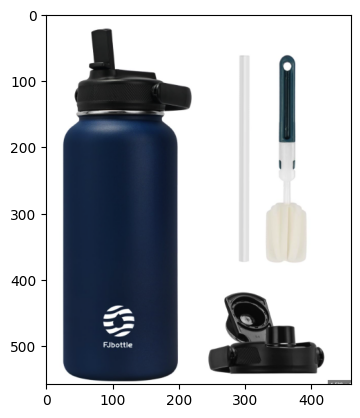

In [5]:
from matplotlib import pyplot as plt
product_image = Image.open(product_image_path)
print(type(product_image))
plt.imshow(product_image)

In [6]:
description_agent = Agent(
    role="Product Description Specialist",
    goal="Write an engaging product listing for an eCommerce platform",
    backstory="Expert in writing compelling listings that convert.",
    verbose=True,
    llm=ollama_llm
)

In [7]:
seo_agent = Agent(
    role="SEO Specialist",
    goal="Generate SEO keywords for the product",
    backstory="Specialized in keyword strategy for eCommerce.",
    verbose=True,
    llm=ollama_llm
)

In [8]:
banner_agent = Agent(
    role="Marketing Copywriter",
    goal="Create a banner caption that grabs attention",
    backstory="Experienced in creating punchy taglines for visual ads.",
    verbose=True,
    llm=ollama_llm
)


#### Creating Tasks

In [9]:
# Task 1: Generate listing
task1 = Task(
    description=(
        "Using the product description and image path, write an engaging product listing. "
        "Description: '{product_text}' | Image path: '{product_image_path}'"
    ),
    expected_output="A product listing paragraph describing the benefits and features.",
    agent=description_agent
)


In [10]:
# Task 2: Generate SEO Keywords
task2 = Task(
    description="Using the image and product description, generate 10 relevant SEO keywords.",
    expected_output="A list of 10 SEO keywords or phrases for eCommerce platforms.",
    agent=seo_agent
)


In [13]:
# Task 3: Create Banner Headline
task3 = Task(
    description=(
        "Generate 10 SEO keywords based on the following product info: "
        "Text: '{product_text}' | Image file path: '{product_image_path}'"
    ),
    expected_output="A list of 10 SEO-friendly keywords.",
    agent=seo_agent
)


In [14]:
# Crew with multimodal input
crew = Crew(
    agents=[description_agent, seo_agent, banner_agent],
    tasks=[task1, task2, task3],
    verbose=True
)

In [29]:
product_text = "Eco-friendly reusable water bottle made of stainless steel, 1-liter capacity, keeps water cold for 24 hours."
product_image_path = "bottle_2.png"  



product_text = ""
product_image_path = "gpu.png"  

In [30]:
user_input = {
    "product_text": product_text,
    "product_image_path": product_image_path
}

In [31]:
result = crew.kickoff(inputs=user_input)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 61cfab80-cc42-4605-9b64-885325a814e2                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
       Status: Executing Task...
    └── 🤖 Agent: Product Description Specialist
            Status: In Progress

# Agent: Product Description Specialist
## Task: Using the product description and image path, write an engaging product listing. Description: '' | Image path: 'gpu.png'


# Agent: Product Description Specialist
## Final Answer: 
**Unleash Your Gaming Potential with the Ultimate Graphics Processing Unit!**

**(Image: gpu.png - *Ideally, this image should showcase a powerful, modern GPU*)**

Tired of lag and low frame rates? Ready to experience breathtaking visuals and lightning-fast performance? This high-performance GPU is engineered to deliver an unparalleled gaming and computing experience. Whether you’re a hardcore gamer, a content creator, or simply demand the best, this GPU will transform your workflow and entertainment.

**Key Features & Benefits:**

*   **Blazing-Fast Performance:** Experience smoother gameplay, faster rendering times, and seamless multitasking.
*   **Optimized for Gaming:** Designed for the latest games and demanding titles, maximizing frame rates and visual f

🚀 Crew: crew
└── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
       Status: Executing Task...
    └── 🤖 Agent: Product Description Specialist
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
       Assigned to: Product Description Specialist
       Status: ✅ Completed
    └── 🤖 Agent: Product Description Specialist
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 4e143590-571c-4444-b6a1-17e5fb3b6d55                                                                     │
│  Agent: Product Description Specialist                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: In Progress

# Agent: SEO Specialist
## Task: Generate 10 SEO keywords based on the following product info: Text: '' | Image file path: 'gpu.png'


# Agent: SEO Specialist
## Final Answer: 
1. Gaming GPU 2. High-Performance GPU 3. Graphics Card for Gaming 4. Best GPU for Gaming 5. Gaming PC Components 6. Powerful GPU 7. GPU for Content Creation 8. Video Editing GPU 9. Advanced GPU 10. Gaming PC Upgrade




🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
       Assigned to: SEO Specialist
       Status: ✅ Completed
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: c132c895-68ff-47a2-a700-67cbcd304b79                                                                     │
│  Agent: SEO Specialist                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: 0136bb8e-f415-4b12-a899-1d0f07e18435
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: 0136bb8e-f415-4b12-a899-1d0f07e18435
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: In Progress

# Agent: SEO Specialist
## Task: Generate 10 SEO keywords based on the following product info: Text: '' | Image file path: 'gpu.png'


# Agent: SEO Specialist
## Final Answer: 
1. Gaming GPU 2. High-Performance GPU 3. Graphics Card for Gaming 4. Best GPU for Gaming 5. Gaming PC Components 6. Powerful GPU 7. GPU for Content Creation 8. Video Editing GPU 9. Advanced GPU 10. Gaming PC Upgrade




🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: 0136bb8e-f415-4b12-a899-1d0f07e18435
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 4e143590-571c-4444-b6a1-17e5fb3b6d55
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: c132c895-68ff-47a2-a700-67cbcd304b79
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: 0136bb8e-f415-4b12-a899-1d0f07e18435
       Assigned to: SEO Specialist
       Status: ✅ Completed
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 0136bb8e-f415-4b12-a899-1d0f07e18435                                                                     │
│  Agent: SEO Specialist                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 61cfab80-cc42-4605-9b64-885325a814e2                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [35]:
result.raw

'1. Gaming GPU 2. High-Performance GPU 3. Graphics Card for Gaming 4. Best GPU for Gaming 5. Gaming PC Components 6. Powerful GPU 7. GPU for Content Creation 8. Video Editing GPU 9. Advanced GPU 10. Gaming PC Upgrade'

In [36]:
result

CrewOutput(raw='1. Gaming GPU 2. High-Performance GPU 3. Graphics Card for Gaming 4. Best GPU for Gaming 5. Gaming PC Components 6. Powerful GPU 7. GPU for Content Creation 8. Video Editing GPU 9. Advanced GPU 10. Gaming PC Upgrade', pydantic=None, json_dict=None, tasks_output=[TaskOutput(description="Using the product description and image path, write an engaging product listing. Description: '' | Image path: 'gpu.png'", name=None, expected_output='A product listing paragraph describing the benefits and features.', summary='Using the product description and image path, write an engaging...', raw="**Unleash Your Gaming Potential with the Ultimate Graphics Processing Unit!**\n\n**(Image: gpu.png - *Ideally, this image should showcase a powerful, modern GPU*)**\n\nTired of lag and low frame rates? Ready to experience breathtaking visuals and lightning-fast performance? This high-performance GPU is engineered to deliver an unparalleled gaming and computing experience. Whether you’re a har

In [37]:
print("✅ Final Output:\n", result)


✅ Final Output:
 1. Gaming GPU 2. High-Performance GPU 3. Graphics Card for Gaming 4. Best GPU for Gaming 5. Gaming PC Components 6. Powerful GPU 7. GPU for Content Creation 8. Video Editing GPU 9. Advanced GPU 10. Gaming PC Upgrade
